# Business problem: Detection of fraudulent transaction using machine learning

In [125]:
#import all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report


In [126]:
#load data
data = pd.read_csv("banktransaction.csv")

In [127]:
#data understanding
data.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [128]:
data.tail()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none
2339,transfer,26390,43793,106907,2019-03-25 13:52:00,0,none


In [129]:
data.describe()

,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [130]:
data.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [132]:
data.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud'],
      dtype='object')

In [133]:
data['typeofaction'].unique()

array(['cash-in', 'transfer'], dtype=object)

In [134]:
data['typeoffraud'].unique()

array(['type1', 'type2', 'type3', 'none'], dtype=object)

In [135]:
data['isfraud'].unique()

array([1, 0], dtype=int64)

# Data Analysis
## 1. Check Class imbalance in isfraud

Text(0.5, 1.0, 'Distribution of non fraudulent transactions and fraudulent transactions')

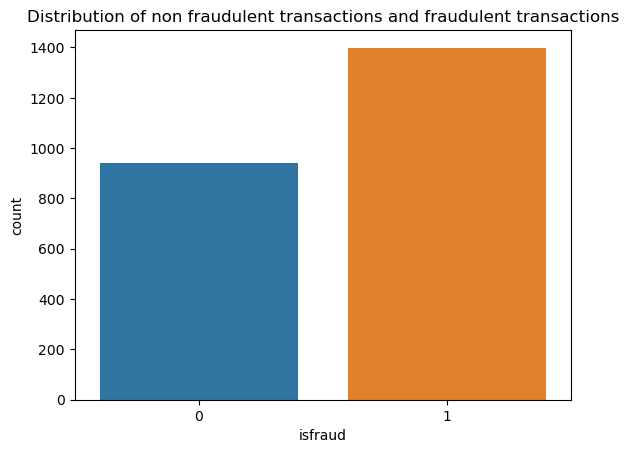

In [136]:
import seaborn as sns
sns.countplot(data = data, x = data["isfraud"])
plt.title("Distribution of non fraudulent transactions and fraudulent transactions")


The dataset has class imbalance and need to be fixed for our model

## 2. Type of action

<function matplotlib.pyplot.show(close=None, block=None)>

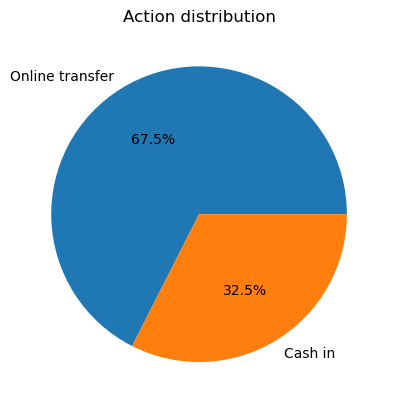

In [137]:
action_counts = data['typeofaction'].value_counts()
plt.pie(action_counts, labels = ["Online transfer","Cash in"], autopct = '%1.1f%%')
plt.title("Action distribution")
plt.show

This shows that most of the transactions occured via online transfer

## 3. Check percentage of fraud that occured in the two types of transactions

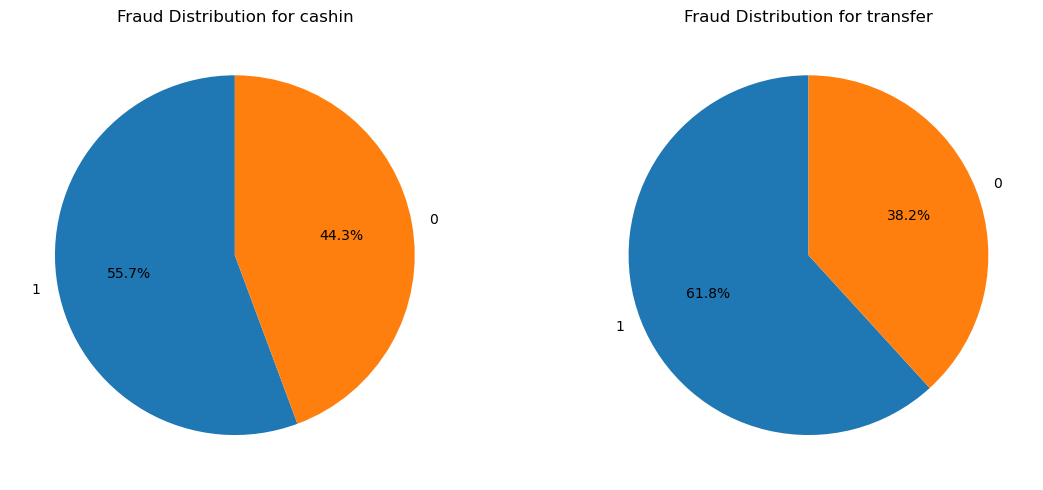

In [138]:
cashin_data = data[data['typeofaction'] == 'cash-in']
transfer_data = data[data['typeofaction'] == 'transfer']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for 'cashin'
if len(cashin_data) > 0:
    cashin_counts = cashin_data['isfraud'].value_counts()
    axes[0].pie(cashin_counts, labels=cashin_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Fraud Distribution for cashin')
else:
    axes[0].text(0.5, 0.5, 'No cashin data', ha='center', va='center', fontsize=12)

# Pie chart for 'transfer'
if len(transfer_data) > 0:
    transfer_counts = transfer_data['isfraud'].value_counts(dropna=False)
    axes[1].pie(transfer_counts, labels=transfer_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Fraud Distribution for transfer')
else:
    axes[1].text(0.5, 0.5, 'No transfer data', ha='center', va='center', fontsize=12)

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

There are more frauds occuring in transfer than in cash-in

## 4. Visualise the the type of fraud

In [139]:
type_counts = data["typeoffraud"].value_counts()
categories = type_counts.index
counts = type_counts.values
fig = px.bar(x=categories, y=counts, color=categories, labels={'x': 'Type of Fraud', 'y': 'Count'}, title='Count of Different Types of Fraud')
fig.update_xaxes(tickangle=45)
fig.show()


The figure above clearly illustrates the distribution of transactions within the dataset. It is evident that the majority of transactions fall into the non-fraudulent category, constituting the largest portion. Following this, we observe a significant representation of Type 3 fraud. Meanwhile, Type 2 and Type 1 fraud categories exhibit notably lower occurrences, with Type 1 being the least prevalent among the types.

## Preprocessing

In [140]:
data["date"] = pd.to_datetime(data.date)

In [141]:
data["date"].dtype

dtype('<M8[ns]')

In [142]:
#preprocessing
enc = LabelEncoder()
data['typeofaction'] = enc.fit_transform(data['typeofaction'])
#encode type of fraud
data["typeoffraud"] = enc.fit_transform(data["typeoffraud"])

In [143]:
#understand the correlation
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_5680\2209427707.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud
typeofaction,1.000000,0.002986,0.080549,0.284777,0.058395,0.393893
sourceid,0.002986,1.000000,0.002055,0.045877,0.027593,0.009439
destinationid,0.080549,0.002055,1.000000,-0.079404,0.084050,0.142042
amountofmoney,0.284777,0.045877,-0.079404,1.000000,-0.006959,-0.037925
isfraud,0.058395,0.027593,0.084050,-0.006959,1.000000,0.848859
typeoffraud,0.393893,0.009439,0.142042,-0.037925,0.848859,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_5680\3620305456.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



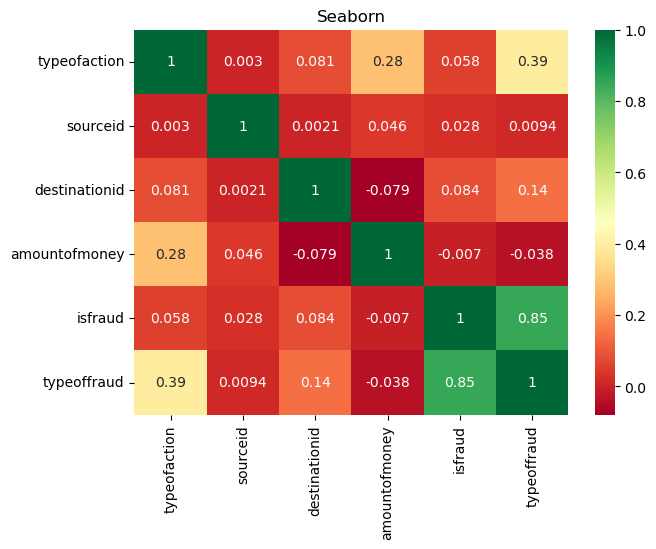

In [144]:
fig = plt.figure(figsize = (7,5))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.title("Seaborn")
plt.show()

In [145]:
#split into input and output data
X = data[['typeofaction', 'sourceid', 'destinationid', 'amountofmoney']]
y = data[["isfraud"]]

In [146]:
#split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 422)

In [147]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1872, 4) (468, 4) (1872, 1) (468, 1)


In [148]:
#train the model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
y_pred = model.predict(X_test)

In [153]:
error = mean_squared_error(y_test,y_pred)
error2 = mean_absolute_error(y_test,y_pred)
acc = r2_score(y_test,y_pred)
print("Goodness_of_fit: ", acc)
print("Error: ", error )
print("Error: ", error2 )

Goodness_of_fit:  0.8239145157649184
Error:  0.042735042735042736
Error:  0.042735042735042736


In [151]:
# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)
# Extract TP and FP from the confusion matrix
tn, fp, fn, tp = confusion.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
# Generate a classification report for additional metrics
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[183  11]
 [  9 265]]
True Positives (TP): 265
False Positives (FP): 11

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       194
           1       0.96      0.97      0.96       274

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



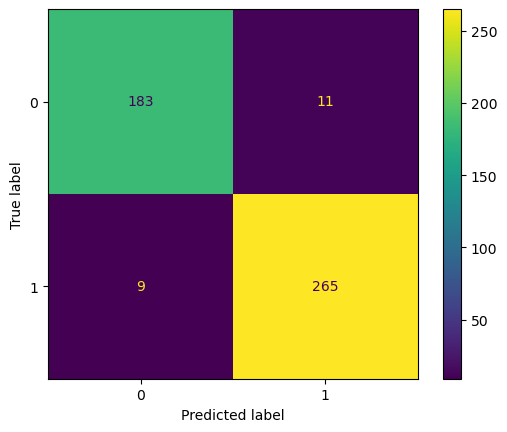

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()